

# Project: Crime in Boston

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This describes the crime analysis in Boston from the years 2013 to 2018. The crimes in Boston have been analyzed through the time and District.

In [38]:
#This is ceel to callout the libraries required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The data chosen is about Crimes in Boston (https://www.kaggle.com/ankkur13/boston-crime-data). This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

In [39]:
# Loading the file
df = pd.read_csv("crime.csv", encoding='latin-1')

In [40]:
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
INCIDENT_NUMBER        327820 non-null object
OFFENSE_CODE           327820 non-null int64
OFFENSE_CODE_GROUP     327820 non-null object
OFFENSE_DESCRIPTION    327820 non-null object
DISTRICT               326046 non-null object
REPORTING_AREA         327820 non-null object
SHOOTING               1055 non-null object
OCCURRED_ON_DATE       327820 non-null object
YEAR                   327820 non-null int64
MONTH                  327820 non-null int64
DAY_OF_WEEK            327820 non-null object
HOUR                   327820 non-null int64
UCR_PART               327727 non-null object
STREET                 316843 non-null object
Lat                    307188 non-null float64
Long                   307188 non-null float64
Location               327820 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 42.5+ MB


### Data Cleaning 

We need to clean the data, fill or delete all the NA values.

The following columns going to be dropped as they will not be used for the analysing
> OFFENSE_CODE  <br />
UCR_PART                   
STREET                  
Lat       
INCIDENT_NUMBER 
Long                    
Location 

In [42]:
df1 = df.drop(['UCR_PART', 'Lat', 'Long', 'Location', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'STREET'], axis = 1)

In [43]:
df1.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
SHOOTING               326765
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
dtype: int64

The SHOOTING contains 'Y' if a shooting occured and 'NaN' otherwise. Replacing NaN with 'N'.

In [44]:
df1["SHOOTING"].unique()

array([nan, 'Y'], dtype=object)

In [45]:
df1["SHOOTING"].replace(np.nan, 'N', regex=True, inplace = True)
df1["SHOOTING"].unique()

array(['N', 'Y'], dtype=object)

The DISTRICT column contains null values. Since the rows of missing values are small compared to the total number of rows, we will remove all the rows with missing NA.

In [46]:
df1.dropna(inplace = True)
df1.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
SHOOTING               0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will compute statistics and create visualizations using the data provided.

### Does the frequency of crimes in Boston change over the hour? Day? Month? Year? 

> The following will be the hourly, monthly and yearly crimes happening in Boston.

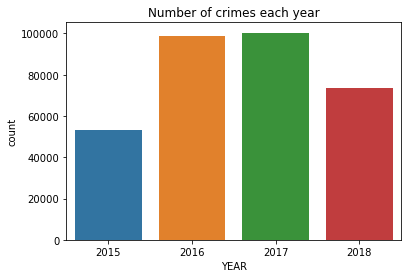

In [47]:
sns.countplot('YEAR', data = df1)
plt.title('Number of crimes each year')
plt.show()

> The crime in Boston has increased by 40000 during the years 2016 and 2017. By 2018, there is a drop in the number by 30000.


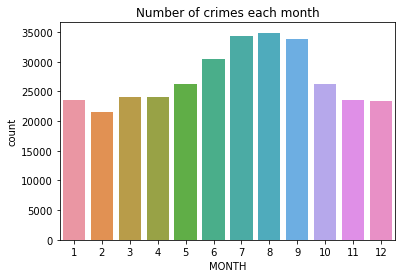

In [72]:
sns.countplot('MONTH', data =df1)
plt.title('Number of crimes each month')
plt.show()

> The frequency of crimes is the highest during Summer (June, July, August and September) and August being the highest. Also February is the lowest and February having fewer days can be a reason for this.

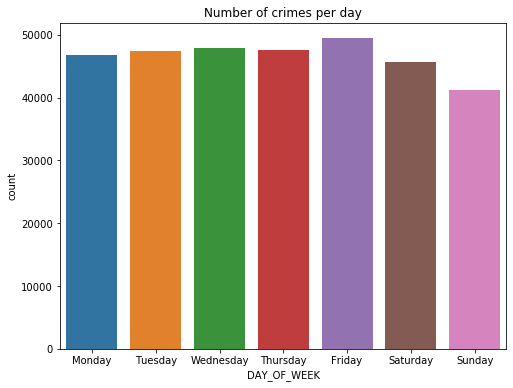

In [73]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
plt.subplots(figsize =(8,6))
sns.countplot('DAY_OF_WEEK', data =df1, order = day_of_week)
plt.title('Number of crimes per day')
plt.show()

> The crimes are almost constant throughout the week. Noticable changes can be seen on Friday where the crime rate is he highest and on Sunday, where the crime rate is the lowest.

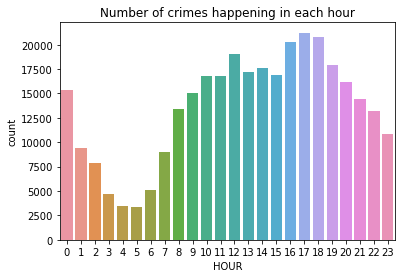

In [74]:
sns.countplot('HOUR', data = df1)
plt.title('Number of crimes happening in each hour')
plt.show()

> The crime rate in the day appear to be a sinusoidal function, the lowest being in the early mornings while the highest occuring during the evenings.

### Has Crime in each District changed?

Let us see the different types of crimes happening in Boston.

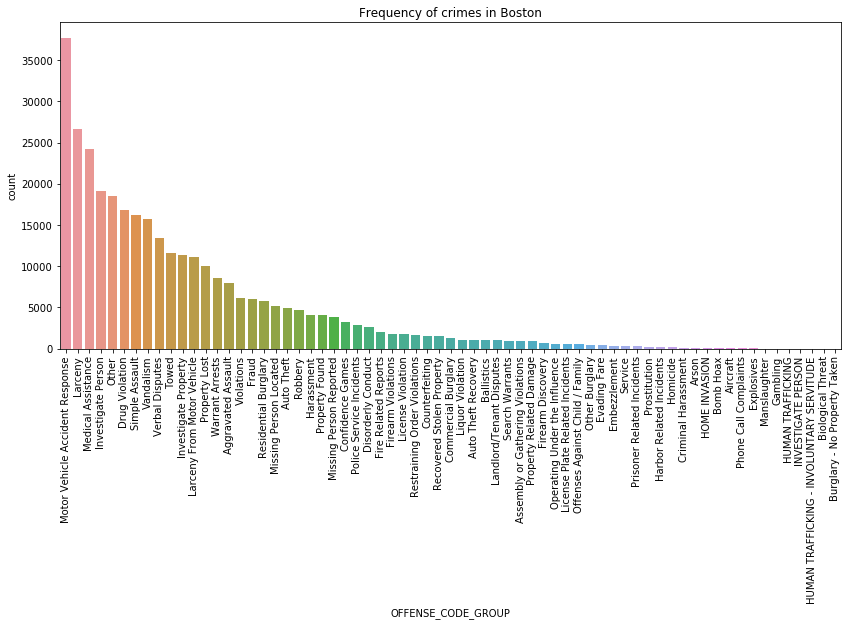

In [51]:
plt.subplots(figsize =(14,6))
sns.countplot('OFFENSE_CODE_GROUP', data =df1, order=df1['OFFENSE_CODE_GROUP'].value_counts().index )
plt.xticks(rotation=90)
plt.title('Different types of crimes ')
plt.show()

> The graph represents the different types of crimes happening in Boston and their frequecies. Motor Vehicle Accident Response and Larceny are the two mostly commonly commited crimes in Boston.

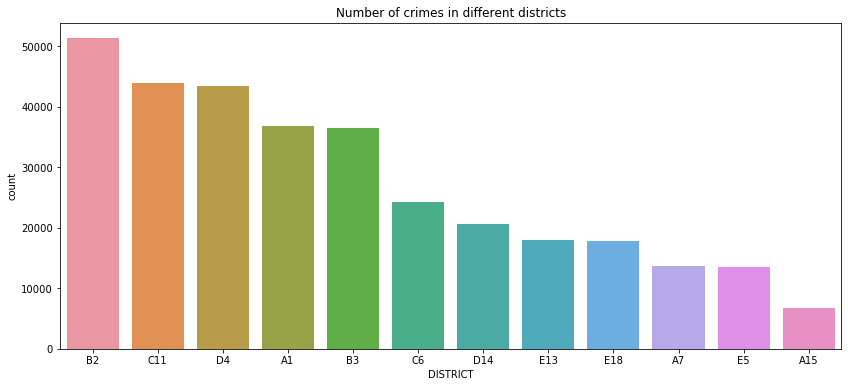

In [58]:
plt.subplots(figsize =(14,6))
sns.countplot('DISTRICT', data =df1, order=df1['DISTRICT'].value_counts().index)
plt.title('Number of crimes in different districts')
plt.show()

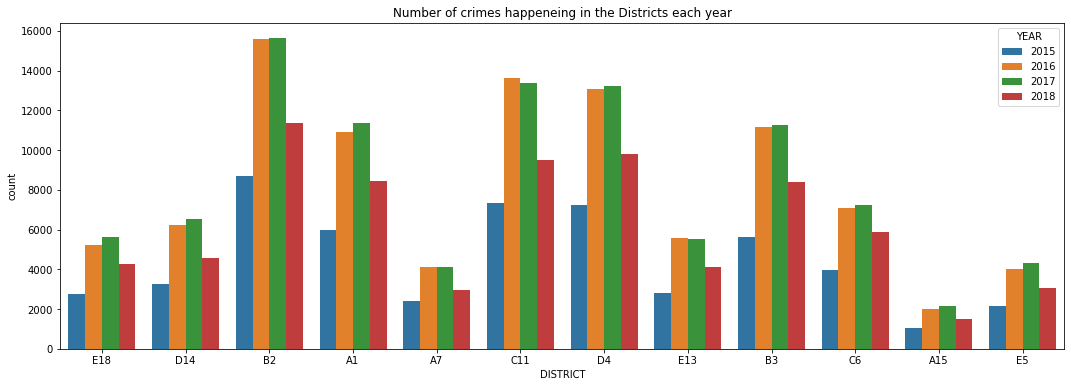

In [71]:
plt.subplots(figsize =(18,6))
sns.countplot("DISTRICT", hue ='YEAR' , data = df1)
plt.title('Number of crimes happeneing in the Districts each year')
plt.show()

> Most of the crime occured in the B2 District. The least crimes occured in the A15 district.

## Has shooting increased in the recent years?

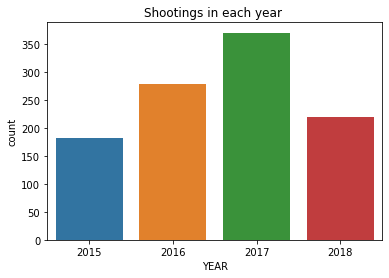

In [61]:
#creating a new dataframe where shooting happened
df_shooting = df1.loc[df1['SHOOTING']=='Y']
sns.countplot('YEAR', data = df_shooting)
plt.title('Shootings in each year ')
plt.show()

> We can see a steady increase in the gun shooting over the year. By 2018 we see a decrease in the shooting.

<a id='conclusions'></a>
## Conclusions

> The reports shows the crime that occured in the Boston, a city in USA. Using the variables, we were able to derive solutions to different questions. We see a lot of variations in the crime rate is due to the fact that the data set is from the 6th month of 2015 and till 10th of 2018 does not make such an inference possible. (See: Number of Crimes by Month, Day and Hour for Each Years) In this context, considering that the dataset contains only 6 months of 2015 and only 9 months of 2018, we can conclude that the number of crimes has not changed significantly according to years. Most number of crimes has been reported in the B2 district and  Motor Vehicle Accident Response being the highest crime committed. 



In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255